In [1]:
import math
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'



2023-06-07 13:31:40.671353: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# stock_data = yf.download('TSLA', start='2016-01-01', end='2021-10-01')
# stock_data.head()
tsla = yf.Ticker('TSLA')
tsla.info

{'address1': '1 Tesla Road',
 'city': 'Austin',
 'state': 'TX',
 'zip': '78725',
 'country': 'United States',
 'phone': '512 516 8177',
 'website': 'https://www.tesla.com',
 'industry': 'Auto Manufacturers',
 'industryDisp': 'Auto Manufacturers',
 'sector': 'Consumer Cyclical',
 'longBusinessSummary': 'Tesla, Inc. designs, develops, manufactures, leases, and sells electric vehicles, and energy generation and storage systems in the United States, China, and internationally. It operates in two segments, Automotive, and Energy Generation and Storage. The Automotive segment offers electric vehicles, as well as sells automotive regulatory credits; and non-warranty after-sales vehicle, used vehicles, retail merchandise, and vehicle insurance services. This segment also provides sedans and sport utility vehicles through direct and used vehicle sales, a network of Tesla Superchargers, and in-app upgrades; purchase financing and leasing services; services for electric vehicles through its compa

In [3]:
tsla.history(period='1y')

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-06-08 00:00:00-04:00,240.086670,249.963333,239.176666,241.866669,76210500,0.0,0.0
2022-06-09 00:00:00-04:00,249.339996,255.546661,239.326660,239.706665,96491400,0.0,0.0
2022-06-10 00:00:00-04:00,235.156662,239.500000,227.913330,232.229996,97536600,0.0,0.0
2022-06-13 00:00:00-04:00,223.166672,226.633331,214.683334,215.736664,102767400,0.0,0.0
2022-06-14 00:00:00-04:00,218.286667,226.330002,211.736664,220.889999,97988700,0.0,0.0
...,...,...,...,...,...,...,...
2023-06-01 00:00:00-04:00,202.589996,209.800003,199.369995,207.520004,148029900,0.0,0.0
2023-06-02 00:00:00-04:00,210.149994,217.250000,209.750000,213.970001,164129000,0.0,0.0
2023-06-05 00:00:00-04:00,217.800003,221.289993,214.520004,217.610001,151143100,0.0,0.0


In [4]:
data = tsla.history(period='1y')
data = data[['Open', 'High', 'Low', 'Close', 'Volume']]

In [5]:
data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2022-06-08 00:00:00-04:00,240.086670,249.963333,239.176666,241.866669,76210500
2022-06-09 00:00:00-04:00,249.339996,255.546661,239.326660,239.706665,96491400
2022-06-10 00:00:00-04:00,235.156662,239.500000,227.913330,232.229996,97536600
2022-06-13 00:00:00-04:00,223.166672,226.633331,214.683334,215.736664,102767400
2022-06-14 00:00:00-04:00,218.286667,226.330002,211.736664,220.889999,97988700


In [6]:
# plt.figure(figsize=(15, 8))
# plt.title('Stock Prices History')
# plt.plot(data['Close'])
# plt.xlabel('Date')
# plt.ylabel('Prices ($)')

In [49]:
closing_price_data = data['Close'].values
print(len(closing_price_data))
print(closing_price_data)

training_data_size = math.ceil(len(closing_price_data) * 0.8)
print(training_data_size)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_price_data.reshape(-1, 1))

train_data = scaled_data[:training_data_size]

x_train = train_data[60:]
y_train = train_data[60:]

x_train = np.array([train_data[i-60:i] for i in range(60, len(train_data))])
y_train = np.array([train_data[i] for i in range(60, len(train_data))])

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

251
[241.8666687  239.70666504 232.22999573 215.73666382 220.88999939
 233.         213.1000061  216.75999451 237.03666687 236.08666992
 235.07000732 245.70666504 244.91999817 232.66333008 228.49000549
 224.47332764 227.26333618 233.06666565 231.7333374  244.54333496
 250.76333618 234.34333801 233.07000732 237.03999329 238.31333923
 240.06666565 240.54666138 245.52999878 247.5        271.70666504
 272.24334717 268.43331909 258.85998535 274.82000732 280.8999939
 297.1499939  297.27667236 300.58666992 307.39666748 308.6333313
 288.17001343 290.42333984 283.33334351 294.35665894 286.63000488
 300.02999878 309.32000732 306.56332397 303.99667358 302.86999512
 296.66665649 289.91333008 296.45333862 297.09667969 296.07000732
 288.08999634 284.82000732 277.70001221 275.60998535 277.16000366
 270.20999146 274.42001343 283.70001221 289.26000977 299.67999268
 304.42001343 292.13000488 302.60998535 303.75       303.3500061
 309.07000732 308.73001099 300.79998779 288.58999634 275.32998657
 276.0100

In [13]:
print(training_data_size)
test_data = scaled_data[training_data_size-60: , : ]
x_test = []
y_test = closing_price_data[training_data_size:]

print(len(test_data))

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
print(len(x_test))

201
110
50


In [14]:
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()

2023-06-07 13:35:29.188730: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-07 13:35:29.191266: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-07 13:35:29.192551: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 25)                2525      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(optimizer='sgd', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size= 1, epochs=3)

Epoch 1/3


2023-06-07 13:35:32.477071: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-07 13:35:32.478362: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-07 13:35:32.480218: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

141/141 [==============================] - 4s 15ms/step - loss: 0.0555
Epoch 2/3
141/141 [==============================] - 2s 14ms/step - loss: 0.0210
Epoch 3/3
141/141 [==============================] - 2s 15ms/step - loss: 0.0158


In [16]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

2023-06-07 13:35:43.280032: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-07 13:35:43.281313: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-07 13:35:43.283033: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2/2 [==============================] - 1s 11ms/step


8.81939239501953

/var/folders/bb/rf48tj5n0g75x7v63p4n_h_h0000gn/T/ipykernel_2200/2836857385.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predictions


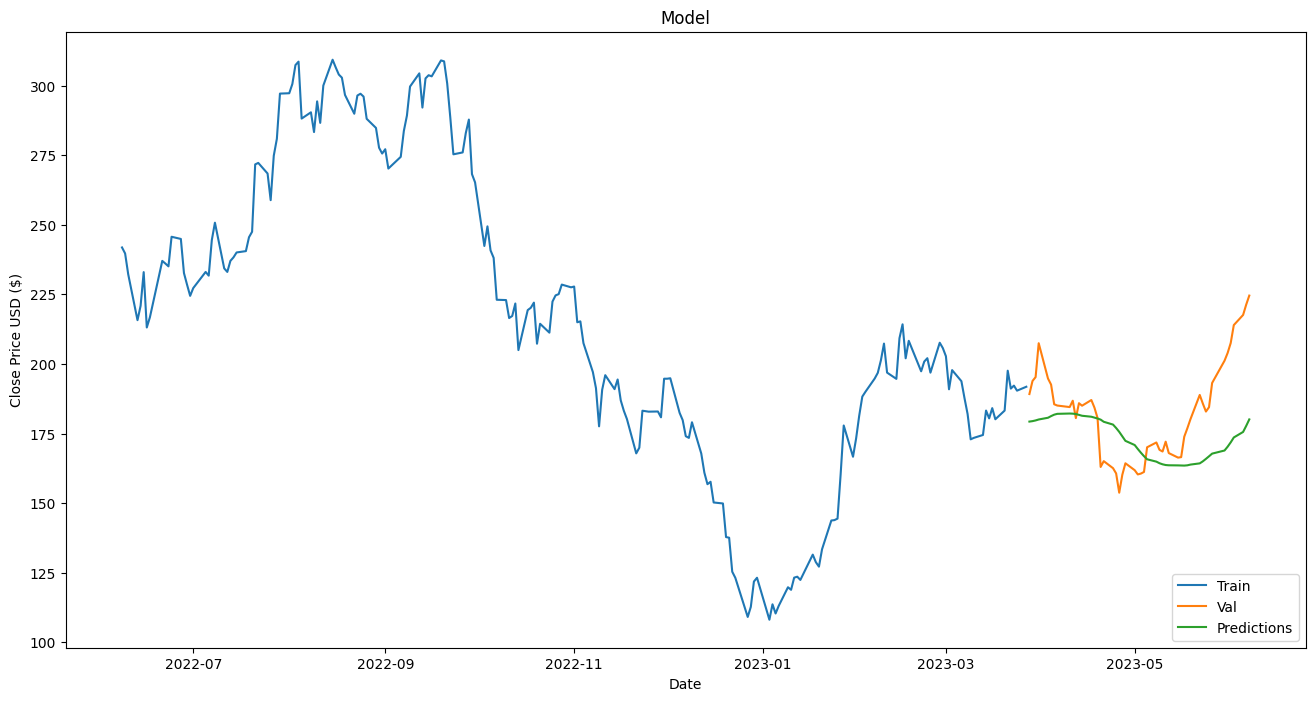

In [19]:
data_b = data.filter(['Close'])
train = data_b[:training_data_size]
validation = data_b[training_data_size:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train)
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

/var/folders/bb/rf48tj5n0g75x7v63p4n_h_h0000gn/T/ipykernel_2200/1931667330.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predictions


50
                                Close  Predictions
Date                                              
2023-06-02 00:00:00-04:00  213.970001   173.587387
2023-06-05 00:00:00-04:00  217.610001   175.571762
2023-06-06 00:00:00-04:00  221.309998   177.745224
2023-06-07 00:00:00-04:00  224.570007   180.077805


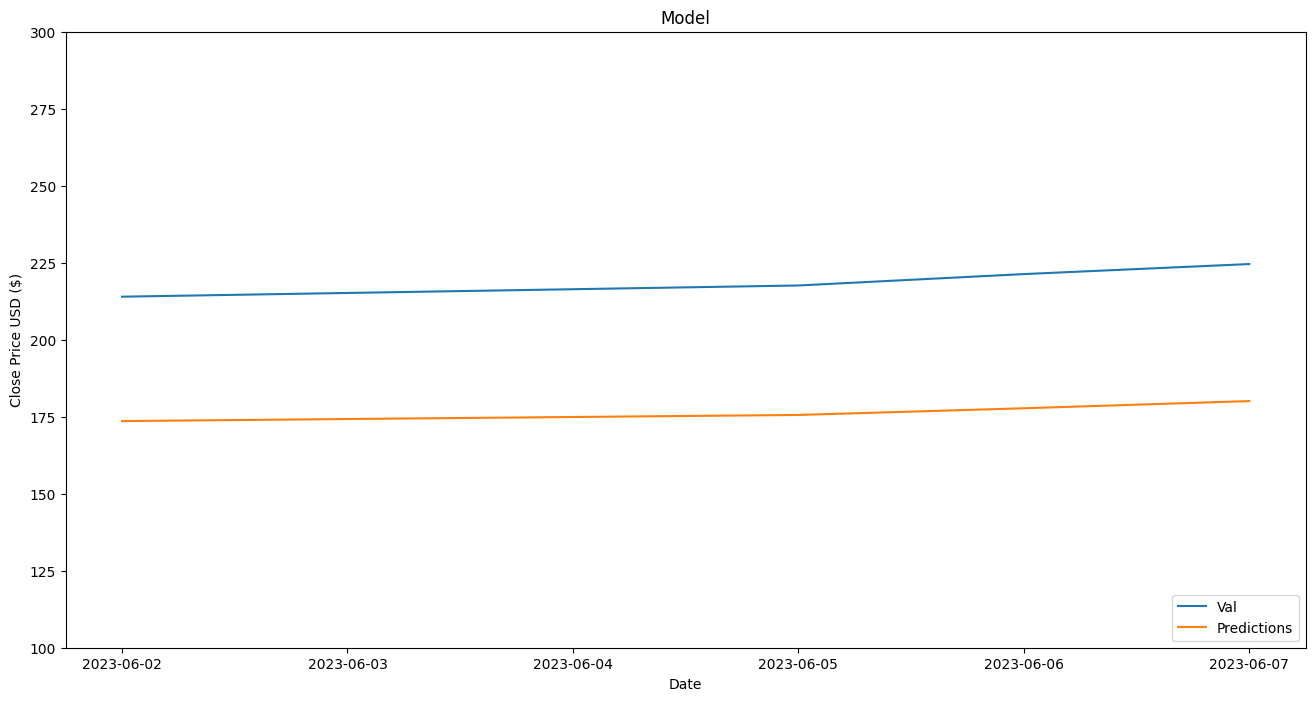

In [21]:
data_b = data.filter(['Close'])
train = data_b[:training_data_size]
validation = data_b[training_data_size:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
# plt.plot(validation[['Close', 'Predictions']])

print(validation.shape[0])
print(validation.iloc[46:][0:])
plt.ylim(100, 300)
plt.plot(validation.iloc[46:][0:])

plt.legend(['Val', 'Predictions'], loc='lower right')
plt.show()

In [39]:
validations = data_b[training_data_size:]
print(validations['Close'])
print(validations['Close'].shape[0])

Date
2023-03-28 00:00:00-04:00    189.190002
2023-03-29 00:00:00-04:00    193.880005
2023-03-30 00:00:00-04:00    195.279999
2023-03-31 00:00:00-04:00    207.460007
2023-04-03 00:00:00-04:00    194.770004
2023-04-04 00:00:00-04:00    192.580002
2023-04-05 00:00:00-04:00    185.520004
2023-04-06 00:00:00-04:00    185.059998
2023-04-10 00:00:00-04:00    184.509995
2023-04-11 00:00:00-04:00    186.789993
2023-04-12 00:00:00-04:00    180.539993
2023-04-13 00:00:00-04:00    185.899994
2023-04-14 00:00:00-04:00    185.000000
2023-04-17 00:00:00-04:00    187.039993
2023-04-18 00:00:00-04:00    184.309998
2023-04-19 00:00:00-04:00    180.589996
2023-04-20 00:00:00-04:00    162.990005
2023-04-21 00:00:00-04:00    165.080002
2023-04-24 00:00:00-04:00    162.550003
2023-04-25 00:00:00-04:00    160.669998
2023-04-26 00:00:00-04:00    153.750000
2023-04-27 00:00:00-04:00    160.190002
2023-04-28 00:00:00-04:00    164.309998
2023-05-01 00:00:00-04:00    161.830002
2023-05-02 00:00:00-04:00    160.30

In [38]:
print(predictions[0][0])
print(predictions.shape[0])

179.29616
50


In [47]:
# Mean Absolute Error: sum(predicted - actual)/n
count = 0

for i in range(0, predictions.shape[0]):
    count = count + abs(predictions[i] - validations['Close'][i])
    
mean_absolute_error = count / 50
print("Mean Absolute Error: ", mean_absolute_error[0])

# Mean Absolute Error Percentage: 
percentage_count = 0

for i in range(0, predictions.shape[0]):
    percentage_count = percentage_count + abs((validations['Close'][i] - predictions[i])/validations['Close'][i])
    
mean_absolute_error = percentage_count / 50
print("Mean Absolute Error Percentage: ", mean_absolute_error[0])

Mean Absolute Error:  14.4067955
Mean Absolute Error Percentage:  0.07598197
